# Cap7
## 7.3
### a)

Usando Biot-Savart para fio teremos 

$$ H = \frac{1}{4\pi} \int_{corpo}\frac{Id\vec{l} \times \vec{r}}{r^2} $$

logo dadas as codições ficamos com 

$$ H = \frac{I}{2\pi\rho} a_\phi - \int_{-a}^a \frac{Id\vec{z}\ a_z \ \times  [\rho a_\rho - z a_z]}{4\pi[\rho^2+z^2]^{\frac{3}{2}}}$$

In [660]:
import sympy as sp 
from math import *
import numpy as np 
import sympy.vector as spv

R = spv.CoordSys3D('R') #sentando coord cartesian, a unitario de referencia
# c = spv.CoordSys3D('c', transformation='cylindrical', variable_names=('rho','phi','z')) #setando coord cilindricas, c unitario de referencia


p,I,z,a,theta = sp.symbols("rho I z a theta")
# a = CoordSys3D('a', transformation= lambda p,theta,z: (p*sp.cos(theta),p*sp.sin(theta),z)
# ##vetores unitários
ap = sp.Matrix([1,0,0])
aphi = sp.Matrix([0,1,0])
az = sp.Matrix([0,0,1])

f = ((I*az).cross(p*ap-z*az))/(4*sp.pi*(p**2+z**2)**(3/2))

f

Matrix([
[                                   0],
[I*rho*(rho**2 + z**2)**(-1.5)/(4*pi)],
[                                   0]])

In [661]:
H = (I/(2*sp.pi*p))*aphi - sp.integrate(f,(z,-a,a))
H[1].evalf(4)

-0.1592*I*a*rho**(-2.0)*(a**2/rho**2 + 1.0)**(-0.5) + 0.1592*I/rho

### b)

## cap8
### 8.5

Sabendo que $$ F = \int_{corpo} I\ dL \times B $$ 
$$ F = \int_{corpo} I\ dL \times \frac{\mu_0 i}{2\pi r} â$$ 

Criaremos uma função que calcula a força en todos os lados

In [662]:
ax = sp.Matrix([1,0,0])
ay = sp.Matrix([0,1,0])
az = sp.Matrix([0,0,1])
r = sp.symbols('r')
mi0 = sp.pi*4e-7
i = 15
I = 6e-6

# a1 e a2 : vetores unitarios
# r : distancia até o fio

F = lambda a1,a2,r,eixo,inicio,final: sp.integrate((I*a1).cross(((i*mi0)/(2*sp.pi*r))*a2),(eixo,inicio,final))

### a) 

In [663]:
Fbc = F(az,ay,3,z,1,4)
Fbc

Matrix([
[-1.8e-11],
[       0],
[       0]])

### b)

In [664]:
Fab = F(ax,ay,x,x,1,3)
Fab.evalf(3)

Matrix([
[       0],
[       0],
[1.98e-11]])

### c)

In [665]:
Fda = F(-az,ay,1,z,1,4)
Fda

Matrix([
[5.4e-11],
[      0],
[      0]])

In [666]:
F_total = Fda + Fbc
F_total

Matrix([
[3.6e-11],
[      0],
[      0]])

Uma vez que todas as forças dadas em (N).

## cap9
### 9.15

Sabendo que $B = \mu H $ podemos denotar que 

$$ B = \mu 2\cos(10^{10}t-\beta x) a_z $$

Aplicando Maxwell temos 

$$ \nabla \times H = - \frac{\partial D}{\partial t}$$

Primeiro faremos $ \nabla \times H = -\frac{\partial H}{\partial x} a_y$

In [667]:

b,t = sp.symbols('beta t')

mi = 3e-5
e = 1.2e-10
sig = 0

H = 2*sp.cos(10e10*t-b*x)

dHdx = -H.diff(x)
dHdx
# spv.Del().cross(H)

2*beta*sin(beta*x - 100000000000.0*t)

Usando $D$ ficaremos com $$ D = \int -\frac{\partial H}{\partial x} a_y \ dt$$

In [668]:
D = sp.integrate(dHdx,t)
D*R.j

(2.0e-11*beta*cos(beta*x - 100000000000.0*t))*R.j

posto isso vamos encontrar o campo elétrico, uma vez que $$ E = \frac{D}{\epsilon}$$

In [669]:
E = D/e
E*R.j

(0.166666666666667*beta*cos(beta*x - 100000000000.0*t))*R.j


Usando Maxwell novamente $$ \nabla \times E = - \frac{\partial B}{\partial t}$$
e $\nabla \times E = \frac{\partial E_y}{\partial x} \ a_z $

In [670]:
dEdx = E.diff(x)
dEdx*R.k

(-0.166666666666667*beta**2*sin(beta*x - 100000000000.0*t))*R.k

Usando $B$ ficaremos com $$ B = \int -\frac{\partial E_y}{\partial x} a_z \ dt$$

In [671]:
B = sp.integrate(dEdx,t)
B*R.k

(-1.66666666666667e-12*beta**2*cos(beta*x - 100000000000.0*t))*R.k

Já determinamos que $$ B = \mu 2\cos(10^{10}t-\beta x) a_z $$ logo por comparação a equação a cima podemos denotar que:

$$ 2 \mu = 1.67\cdot 10^{-12} \beta^2 $$

In [672]:
f = 1.67e-12*b**2 - 2*mi
b = sp.solve(f,b)
b

[-5994.00898502620, 5994.00898502620]

Logo ficamos 

In [673]:
D

2.0e-11*beta*cos(beta*x - 100000000000.0*t)

In [674]:
E

0.166666666666667*beta*cos(beta*x - 100000000000.0*t)

In [675]:
B

-1.66666666666667e-12*beta**2*cos(beta*x - 100000000000.0*t)

In [676]:
b

[-5994.00898502620, 5994.00898502620]

## cap4 - José Cardoso
### Q1
#### a)

Como $D$ é constante, uma vez que $r$ é consntate e está paralelo a $d\vec{S}$ podemos escrever que 

$$ \oint D\cdot dS = D\cdot S_{lateral} = D\cdot 2\pi r l $$

temos também $D\cdot 2\pi r l = \rho_l l $

logo fivamos com $$ D = \frac{\rho_l}{2\pi r} (C/m^2)$$

#### b)

sabendo que $D = \epsilon E $ temos que 
$$ E = \frac{\rho_l}{2\pi \epsilon_r\epsilon_0 r} (V/m)$$

#### c)

Para o potencial teremos a integração abaixo 

$$ V = - \int^B_A E\cdot dl $$
$$ V =  \int^a_b \frac{\rho_l}{2\pi \epsilon_r\epsilon_0 r}\cdot dl $$

Resultante em 

$$V = \frac{\rho_l}{2\pi \epsilon_r\epsilon_0} \ln(\frac{b}{a})$$

#### d) 

Já a capacitância do cabo coaxial $C = Q/V $
é dada por 

$$C = \frac{2\pi \epsilon_r\epsilon_0 l }{\ln(\frac{b}{a})} (F)$$

isolando $C/l$ teremos a capacitância por unidade de comprimento 

$$\frac{C}{l} = \frac{2\pi \epsilon_r\epsilon_0  }{\ln(\frac{b}{a})} (F/m)$$

## 4 - Digitadas

Configurando o quadrado como $A=(1,0,0) , B = (3,0,0), C = (1,2,0), D = (3,2,0) $.
Vamos determinar que no fio 
$$ F = \int_{corpo} I\ dL \times B$$ 

e o campo $B = \mu_0 H$ e $H = \frac{15}{2\pi x} az $

In [677]:
H = 15/(2*sp.pi*x)*R.k
B = mi0*H
B

(3.0e-6/x)*R.k

In [678]:
I = 2e-3
F = lambda a,uni,dL,inicio,final :sp.integrate(I*B.subs(x,a).cross(uni),(dL,inicio,final))

Fac = F(1,-R.j,y,0,2)
Fac


(1.20000000000000e-8)*R.i

In [679]:
Fbd = F(3,R.j,y,0,2)
Fbd

(-4.00000000000000e-9)*R.i

In [680]:
Fab = F(x,R.i,x,1,3)
Fab.evalf(4)

(6.592e-9)*R.j

In [681]:
Fdc = F(x,-R.i,x,1,3)
Fdc.evalf(4)

(-6.592e-9)*R.j

In [682]:
F_t = Fab+Fbd+Fac+Fdc
F_t.evalf(4)

(8.000e-9)*R.i

## cap3 - José Cardoso
### Q11

Sabendo que $$\phi = B\cdot A $$ 
e que a f.e.m é $$\epsilon = -\frac{\phi}{T} = -\frac{BA}{T}$$

Posto isso podemos lembrar que $T = f^{-1}$ 

logo ficamos com 

 $$\epsilon = -B\cdot A\cdot f$$


In [683]:
f = 1500/60
B = 50e-3
A = 5e-2*10e-2

e = -B*A*f
e

-0.006250000000000001

$$\epsilon = 6.25mV $$

## cap4 - José Cardoso
### Q12

Como o fluxo magnetico em B é zero, então $\phi_A = \phi_b$ o que implica que $H_A = H_C$. Posto isso vamos para o circuito equivalente abaixo 

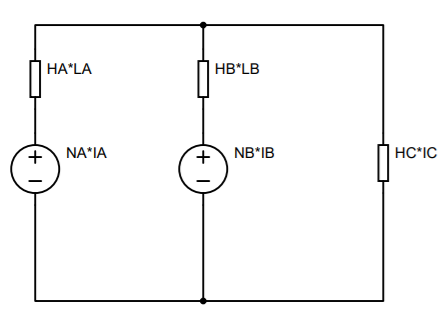

In [684]:
from IPython.display import Image
Image(filename='circuito.png')

Fazendo as malhas do circuito encontramos as seguintes equações 

$$ N_aI_a - H_al_a+H_bl_b-N_bI_b=0 $$

$$ N_bI_b - H_bl_b - H_cl_c=0 $$

$$N_aI_a - H_al_a - H_cl_c = 0 $$ 



In [685]:
na = 1e3
nb = 200
ia = 0.5
la = 60e-2
lb = 16e-2
lc = 60e-2
ib,Hb,Hc,Ha= sp.symbols('I_b H_b H_c H_a')

#Hc = Ha
eq1 = na*ia-Ha*la+Hb*lb-nb*ib

eq2 = nb*ib-Hb*lb-Ha*lc 

eq3 = na*ia-Ha*la-Ha*lc



In [686]:
eq1

-0.6*H_a + 0.16*H_b - 200*I_b + 500.0

In [687]:
eq2

-0.6*H_a - 0.16*H_b + 200*I_b

In [688]:
eq3

500.0 - 1.2*H_a

In [689]:
ha=sp.solve(eq3,Ha)
ha[0]

416.666666666667

Logo $H_a = 2.0833$

In [690]:
eq1sub=eq1.subs(Ha,ha[0])
eq1sub

0.16*H_b - 200*I_b + 250.0

In [691]:
eq2sub=eq2.subs(Ha,ha[0])
eq2sub

-0.16*H_b + 200*I_b - 250.0

In [692]:
eq4=sp.solve((eq1sub,eq2sub))
eq4[H_b]

1250.0*I_b - 1562.5

Aplicando a Lei Circuital de Ampère para $$H_b - \frac{N_bI_b}{l_b}=0$$

In [693]:
eq5 = Hb - nb*ib/lb


In [694]:
resp = sp.solve((eq4[H_b],eq5))

resp[I_b]

1.25000000000000

temos que $I_b = 1.25A$